# Neural Networks with Keras

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np

%cd '/Users/Vincent/Desktop/Python/DataCamp/Data'

/Users/Vincent/Desktop/Python/DataCamp/Data


# Simple binary classification

In [5]:
from sklearn.model_selection import train_test_split

banknotes = pd.read_csv('banknotes.csv')
X = np.array(banknotes.drop('class', axis=1), dtype="float32")
y = np.array(banknotes.loc[:,'class']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3)

model = keras.models.Sequential()

# Add a dense layer 
model.add(keras.layers.Dense(1, input_shape=(4,), activation="sigmoid"))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train, y_train, epochs=20, verbose=False)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test, verbose=False)[1]
print('Accuracy:',accuracy)

Accuracy: 0.9628821


# Multiclass Classfification

In [58]:
darts = pd.read_csv('darts.csv')

coordinates = np.array(darts.drop(['competitor'], axis=1), dtype='float32')

darts.competitor = pd.Categorical(darts.competitor)
darts.competitor = darts.competitor.cat.codes 
competitors = keras.utils.to_categorical(darts.competitor)

In [55]:
model = keras.Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(keras.layers.Dense(128, input_shape=(2,), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(keras.layers.Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(coordinates,competitors, test_size=1/3)

# Train your model on the training data for 100 epochs
model.fit(X_train,y_train, epochs=100, verbose=False)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test, y_test, verbose=False)[1]
print('Accuracy:', accuracy)

Accuracy: 0.7977528


In [66]:
preds = model.predict(X_test[1:10,:])

# Extract the indexes of the highest probable predictions
preds = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{:25} | {}".format(pred,y_test[1:10,:][i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [0. 0. 1. 0.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        0 | [0. 0. 1. 0.]


# Multilabel

In [6]:
irrigation = pd.read_csv("irrigation_machine.csv", index_col=0)
sensors = np.array(irrigation.iloc[:,0:-3], dtype='float32')
parcels = np.array(irrigation.iloc[:,-3:], dtype='float32')

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors
                                                                            ,parcels
                                                                            ,test_size=1/3)

In [7]:
model = keras.Sequential()

# Add a hidden layer of 64 neurons and 20 inputs
model.add(keras.layers.Dense(64, activation="relu", input_shape=(20,)))
# Add an output layer of 3 neurons with sigmoid activation
model.add(keras.layers.Dense(3, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train
          , epochs = 100, validation_split = 0.2,
         verbose=False)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)

preds_rounded = np.round(preds)
print('Rounded Predictions: \n', preds_rounded)

# Evaluate model accuracy on test data
accuracy = model.evaluate(sensors_test, parcels_test, verbose=False)[1]
print('Accuracy:', accuracy)

Rounded Predictions: 
 [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 0.]]
Accuracy: 0.89355314


# Model optimization

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'],loc='upper right')
    plt.show()

def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.show()

In [10]:
# Train model and save its history
history = model.fit(sensors_train, parcels_train
          , epochs = 50, validation_data = (sensors_test,parcels_test), verbose=False)

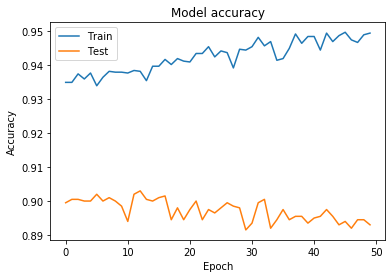

In [11]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

as can be seen, test accuracies slowly worsen at each epoch
, which is an indication that overfitting is occuring on the training set

In [12]:
# Define a callback to monitor val_acc
monitor_val_acc = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
history = model.fit(sensors_train, parcels_train, 
           epochs=100, validation_data=(sensors_test,parcels_test),
           callbacks=[monitor_val_acc], verbose=False)

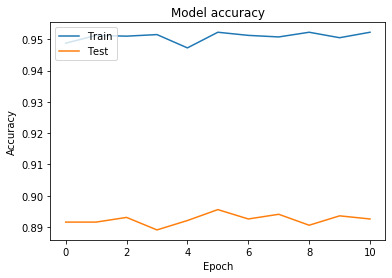

In [13]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

Model is now less confident in making adjustmens and overfitting to the data

# Digits

In [21]:
pixels = np.load('Digits/digits_pixels.npy')
print(pixels.shape)

target = np.load('Digits/digits_target.npy')
target = keras.utils.to_categorical(target)

X_train,X_test,y_train,y_test = train_test_split(pixels,target, test_size=1/3)

(1797, 64)


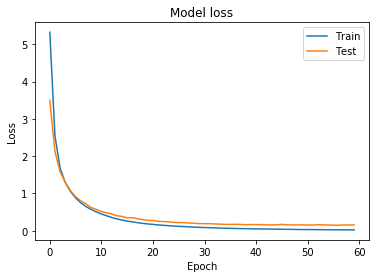

In [22]:
model = keras.Sequential()

# Input and hidden layer with input shape 8x8=64, 
# 16 neurons and relu activation
model.add(keras.layers.Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# learning curve
plot_loss(history.history['loss'], history.history['val_loss'])

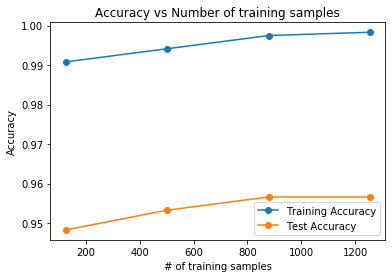

In [33]:
# Check whether larger sample sizes affect model performance
# with early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=1)

training_sizes = [125,  502,  879, 1255]
initial_weights = model.get_weights()

train_accs, test_accs = [], []
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop], verbose=0)

    # Evaluate and store the train fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train, verbose=False)[1])
    test_accs.append(model.evaluate(X_test, y_test, verbose=False)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

# Batch size & normalization

In [46]:
# Build deep network witch batch norm layers
standard = keras.Sequential()

standard.add(keras.layers.Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
standard.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
standard.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
standard.add(keras.layers.Dense(10, activation='softmax', kernel_initializer='normal'))

# Build deep network witch batch norm layers
batchnorm_model = keras.Sequential()

batchnorm_model.add(keras.layers.Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(keras.layers.BatchNormalization())
batchnorm_model.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(keras.layers.BatchNormalization())
batchnorm_model.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(keras.layers.BatchNormalization())
batchnorm_model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
def compare_histories_acc(h1,h2):
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title("Batch Normalization Effects")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
    plt.show()

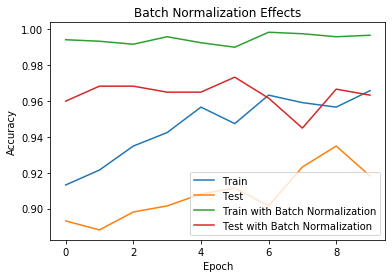

In [51]:
# Train your standard model
history1 = standard.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
# Train the batch normalized
history2 = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

compare_histories_acc(history1, history2)

# Parameter tuning with sklearn

In [67]:
from sklearn import datasets

X, y = datasets.load_breast_cancer(return_X_y=True) 

In [70]:
def create_model(learning_rate=0.01, activation='relu'):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = keras.optimizers.Adam(lr=learning_rate)
  	
  	# Create your binary classification model  
  	model = keras.Sequential()
  	model.add(keras.layers.Dense(128, input_shape=(30,), activation=activation))
  	model.add(keras.layers.Dense(256, activation=activation))
  	model.add(keras.layers.Dense(1, activation='sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  	return model

In [73]:
from sklearn.model_selection import RandomizedSearchCV, KFold

# Sklearn wrapper
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32,128,256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

#random_search.fit(X,y, verbose=0) ## takes a while

In [76]:
from sklearn.model_selection import cross_val_score

model = keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model, epochs = 50, 
                        batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

The mean accuracy was: 0.9121693174044291
With a standard deviation of: 0.019236770885458235


# Autoencoders

In [45]:
def show_encodings(encoded_imgs,number=4):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()

In [64]:
X_test = np.load("MNIST/X_test_MNIST.npy")
X_test_noise = np.load("MNIST/X_test_MNIST_noise.npy")
y_test = np.load("MNIST/y_test_MNIST.npy")
X_test.shape

(100, 784)

In [79]:
autoencoder = keras.Sequential()

scaling = keras.initializers.VarianceScaling(
    scale=1.0, mode='fan_avg', distribution='uniform', seed=None
)

# Add a dense layer with the original image as input
autoencoder.add(keras.layers.Dense(32, input_shape=(784, )
                                   , activation="relu", kernel_initializer=scaling))

# Add an output layer with as many nodes as the image
autoencoder.add(keras.layers.Dense(784, activation="sigmoid", kernel_initializer=scaling))

# Compile  model
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")
autoencoder.fit(X_test,X_test)

Train on 100 samples
100/100 [==============================] - 1s 8ms/sample - loss: 0.6946


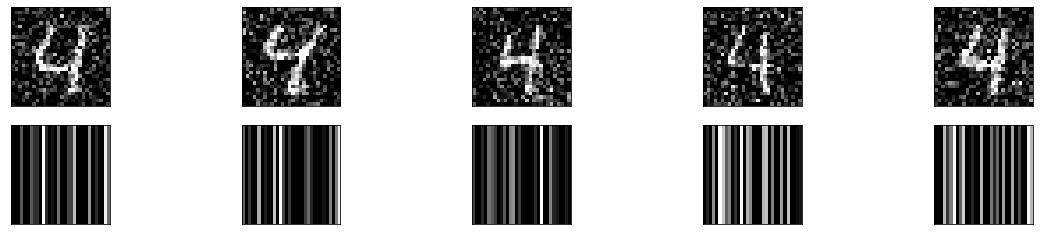

In [80]:
# Build your encoder
encoder = keras.Sequential()
encoder.add(autoencoder.layers[0])

# Encode the images and show the encodings
preds = encoder.predict(X_test_noise)
show_encodings(preds)

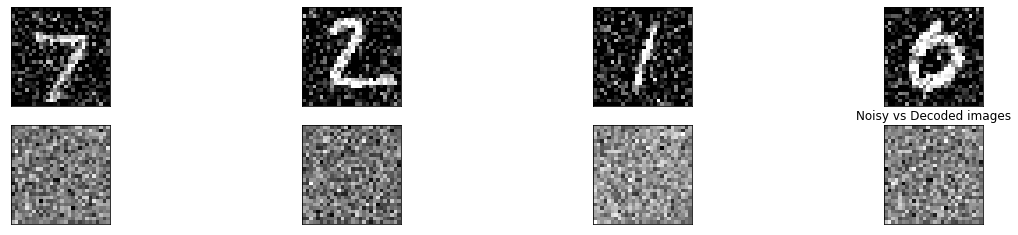

In [83]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

# CNN

In [89]:
X_test = X_test.reshape(100,28,28,1)

model = keras.Sequential()

# Add a convolutional layer of 32 filters of size 3x3 
model.add(keras.layers.Conv2D(32, input_shape=(28, 28, 1), kernel_size=3, activation='relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu'))

# Flatten the previous layer output 
model.add(keras.layers.Flatten())

# Add as many outputs as classes with softmax activation
model.add(keras.layers.Dense(10, activation='softmax'))

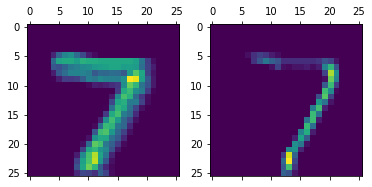

In [98]:
# Obtain a reference to the outputs of the first layer
layer_output = model.layers[0].output

# Build a model using the model input and the first layer output
first_layer_model = keras.Model(inputs = model.input, outputs = layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

# Plot the first digit of X_test for different filters
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(activations[0,:,:,1], cmap = 'viridis')
ax2.matshow(activations[0,:,:,15], cmap = 'viridis')
plt.show()

the first layer is able to identify shapes and edges of the figure, a 7 in this case.